In [66]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D

test_data = np.array(
      [[[ 0.,  1],
        [ 0.,  2]],

       [[ 0.,  0],
        [ 0.,  1]]])
alphas = np.divide(test_data,np.max(test_data))/2.0

Populating the interactive namespace from numpy and matplotlib


In [67]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.colorbar
import matplotlib.colors

def cuboid_data(center, sizes=(1,1,1)):
    # code taken from
    # http://stackoverflow.com/questions/30715083/python-plotting-a-wireframe-3d-cuboid?noredirect=1&lq=1
    # suppose axis direction: x: to left; y: to inside; z: to upper
    # get the (left, outside, bottom) point
    o = [a - b / 2 for a, b in zip(center, sizes)]
    # get the length, width, and height
    l, w, h = sizes
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in bottom surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in upper surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in outside surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  # x coordinate of points in inside surface
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in bottom surface
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in upper surface
         [o[1], o[1], o[1], o[1], o[1]],          # y coordinate of points in outside surface
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]    # y coordinate of points in inside surface
    z = [[o[2], o[2], o[2], o[2], o[2]],                        # z coordinate of points in bottom surface
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],    # z coordinate of points in upper surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],                # z coordinate of points in outside surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]                # z coordinate of points in inside surface
    return x, y, z

def plotCubeAt(pos=(0,0,0), c="b", alpha=0.1, ax=None, sizes = (1,1,1)):
    # Plotting N cube elements at position pos
    if ax !=None:
        X, Y, Z = cuboid_data( (pos[0],pos[1],pos[2]), sizes = sizes)
        ax.plot_surface(X, Y, Z, color=c, rstride=1, cstride=1, alpha=alpha, linewidth = 0, shade = False)

def plotMatrix(ax, x, y, z, data, alphas, sizes = (1,1,1), alpha=0.1):
    # plot a Matrix 
    norm = matplotlib.colors.Normalize(vmin=data.min(), vmax=data.max())
    for i, xi in enumerate(x):
            for j, yi in enumerate(y):
                for k, zi, in enumerate(z):
                    alpha = alphas[i,j,k]
                    plotCubeAt(pos=(xi, yi, zi), c='r', alpha=alpha,  ax=ax, sizes = sizes)



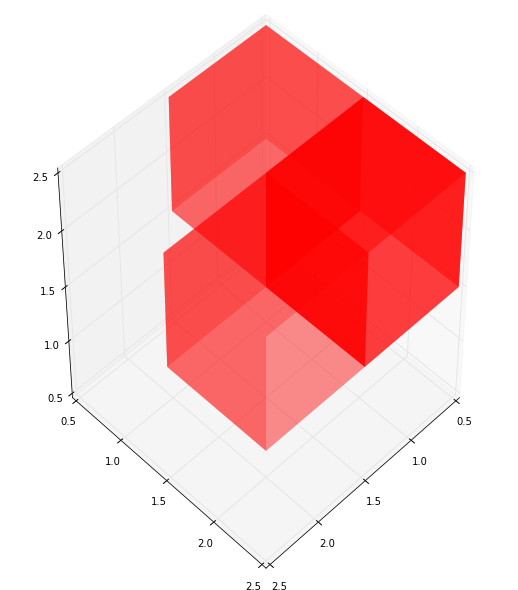

In [68]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.1, 0.7, 0.8], projection='3d')
alphas = np.divide(test_data,np.max(test_data))/2.0
centers = [[0.5,1.5],[0.5,1.5],[0.5,1.5]]
plotMatrix(ax, centers[0], centers[1], centers[2], test_data, alphas)
ax.view_init(azim=45, elev=45)

In [59]:
!python --version

Python 2.7


In [18]:
!pip freeze|grep -E "jupyter|matplotlib"

jupyter==1.0.0
jupyter-client==5.1.0
jupyter-console==5.2.0
jupyter-core==4.4.0
matplotlib==1.5.3
